# Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv('/Users/iragarg/Documents/Datasets/train.csv.xls')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Data Pre-processing

In [5]:
df.shape

(2000, 21)

In [6]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df.drop(["clock_speed"], axis = 1, inplace = True)
df.drop(["fc"], axis = 1, inplace = True)
df.drop(["talk_time"], axis = 1, inplace = True)
df.drop(["pc"], axis = 1, inplace = True)

In [11]:
df.drop(["blue"], axis = 1, inplace = True)

In [12]:
df

,battery_power,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range
0,842,0,0,7,0.6,188,2,20,756,2549,9,7,0,0,1,1
1,1021,1,1,53,0.7,136,3,905,1988,2631,17,3,1,1,0,2
2,563,1,1,41,0.9,145,5,1263,1716,2603,11,2,1,1,0,2
3,615,0,0,10,0.8,131,6,1216,1786,2769,16,8,1,0,0,2
4,1821,0,1,44,0.6,141,2,1208,1212,1411,8,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,2,0.8,106,6,1222,1890,668,13,4,1,1,0,0
1996,1965,1,0,39,0.2,187,4,915,1965,2032,11,10,1,1,1,2
1997,1911,1,1,36,0.7,108,8,868,1632,3057,9,1,1,1,0,3
1998,1512,0,1,46,0.1,145,5,336,670,869,18,10,1,1,1,0


# Data Visualisation

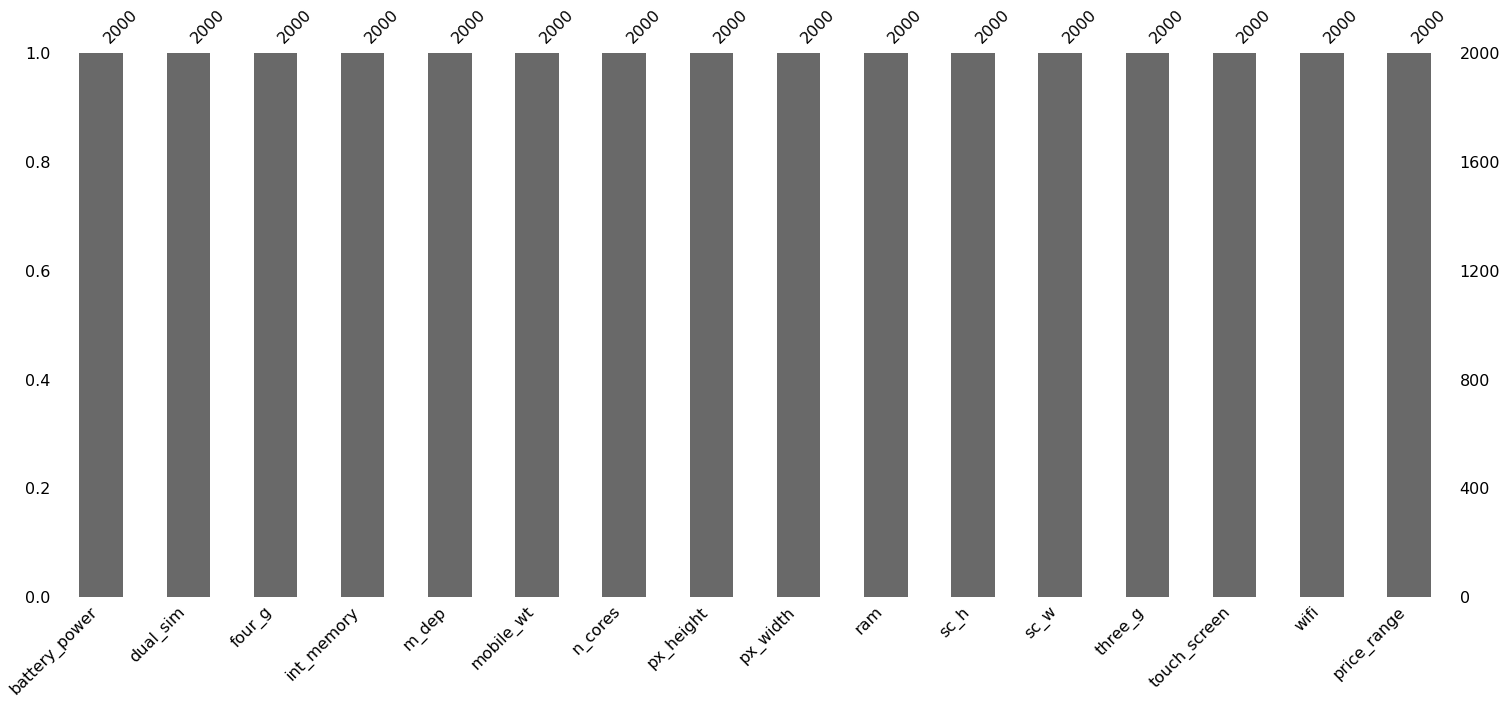

In [13]:
import missingno as msno
msno.bar(df)
plt.show()


In [14]:
df.var()

battery_power    1.930884e+05
dual_sim         2.500348e-01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

In [15]:
df.corr()

,battery_power,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.041847,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.011522,-0.010516,-0.008343,0.200723
dual_sim,-0.041847,1.000000,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.014008,-0.017117,0.022740,0.017444
four_g,0.015665,0.003187,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.019236,0.007448,0.007313,0.027166,0.037005,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,-0.015679,0.008690,1.000000,0.006886,-0.034214,-0.028310,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,-0.022142,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.025263,0.023566,-0.009434,-0.025348,-0.018388,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008979,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.024658,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.006872,0.024480,0.004868,-0.000315,0.025826,-0.014733,0.023774,-0.009964,0.004399
px_height,0.014901,-0.020875,-0.019236,0.010441,0.025263,0.000939,-0.006872,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.031174,0.021891,0.051824,0.148858
px_width,-0.008402,0.014291,0.007448,-0.008335,0.023566,0.000090,0.024480,0.510664,1.000000,0.004105,0.021599,0.034699,0.000350,-0.001628,0.030319,0.165818
ram,-0.000653,0.041072,0.007313,0.032813,-0.009434,-0.002581,0.004868,-0.020352,0.004105,1.000000,0.015996,0.035576,0.015795,-0.030455,0.022669,0.917046


In [16]:
df['price_range'].unique()

array([1, 2, 3, 0])

<AxesSubplot:xlabel='price_range', ylabel='ram'>

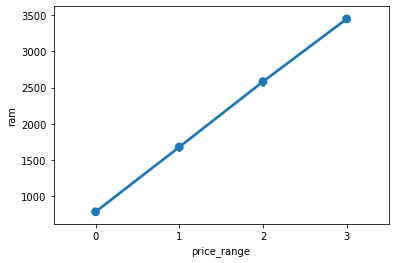

In [17]:
sns.pointplot(y='ram',x='price_range',data=df)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

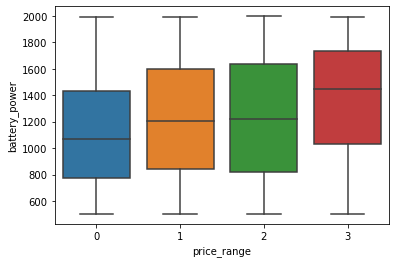

In [18]:
sns.boxplot(x='price_range',y='battery_power',data=df)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

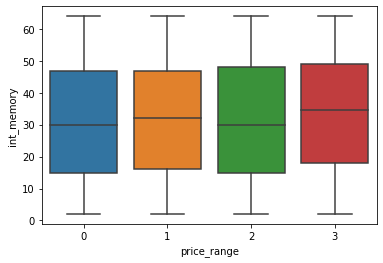

In [19]:
sns.boxplot(x='price_range',y='int_memory',data=df)

In [20]:
col = df.columns
col

Index(['battery_power', 'dual_sim', 'four_g', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [21]:
categorical_col = ['dual_sim','four_g','three_g','touch_screen','price_range']

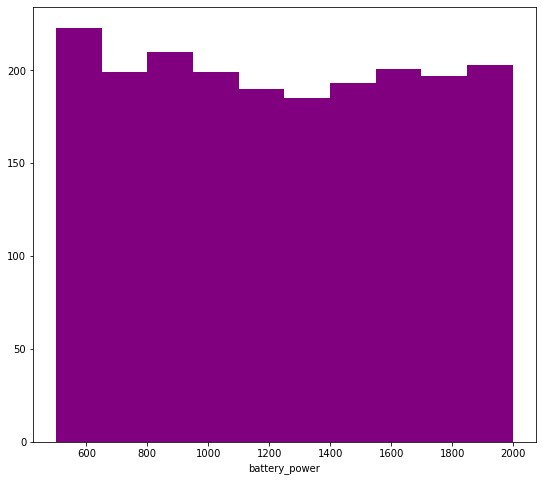

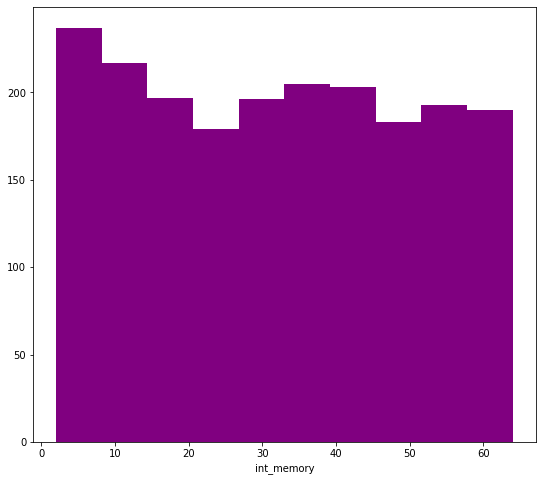

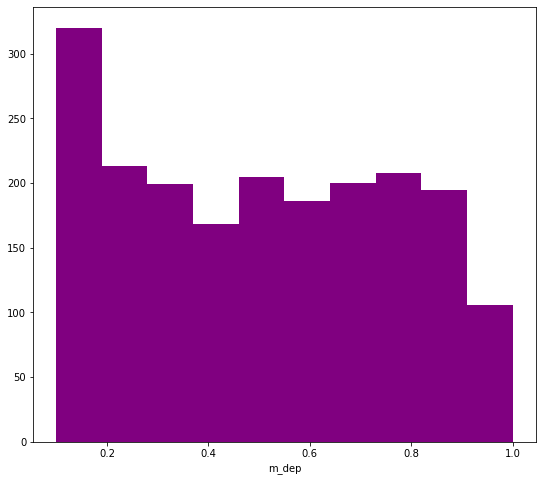

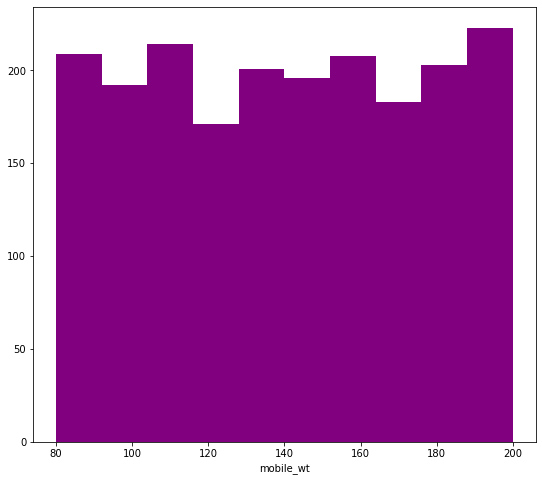

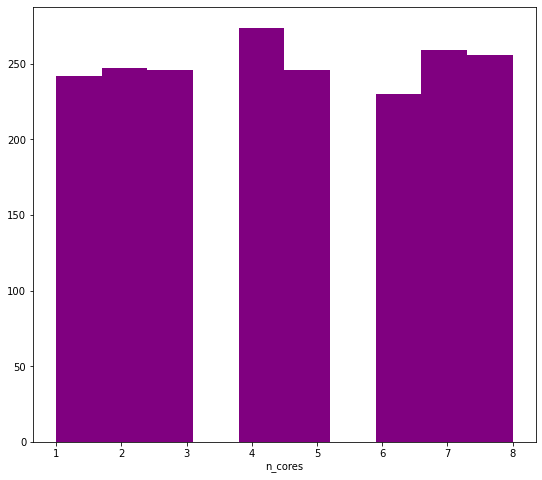

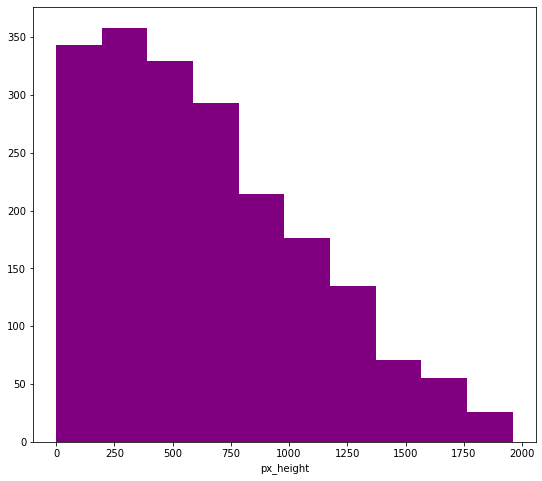

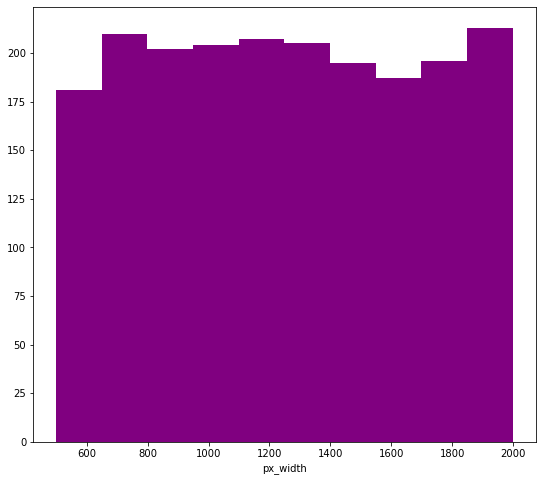

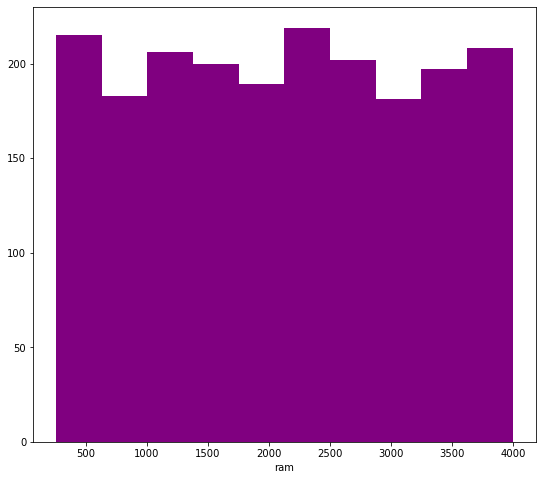

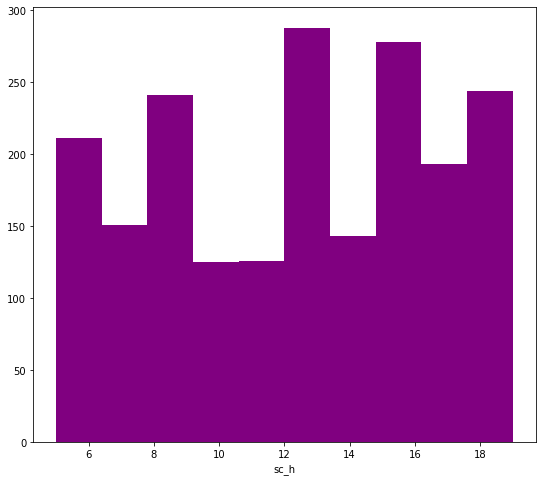

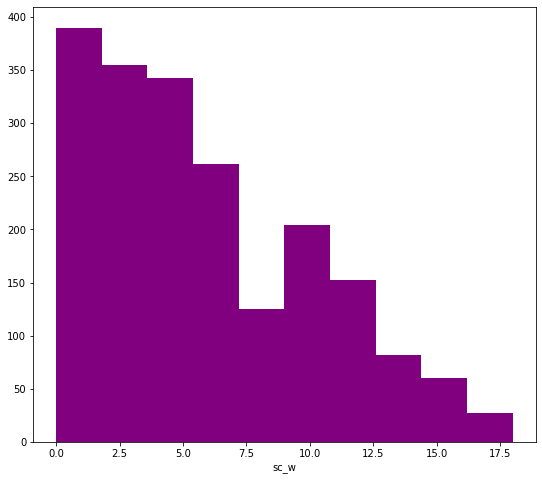

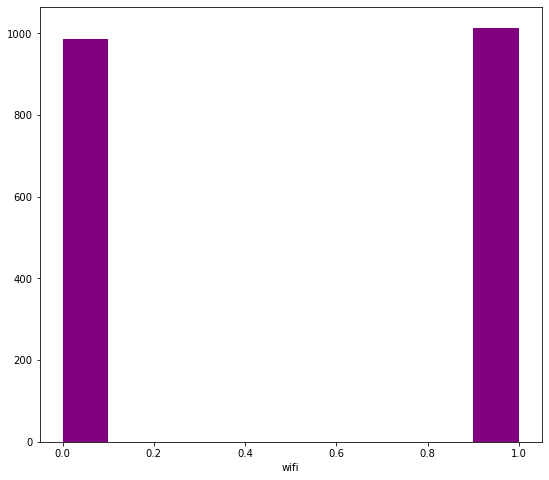

In [22]:
 for i in df.drop(df[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

Text(0.5, 1.0, 'Correlation ')

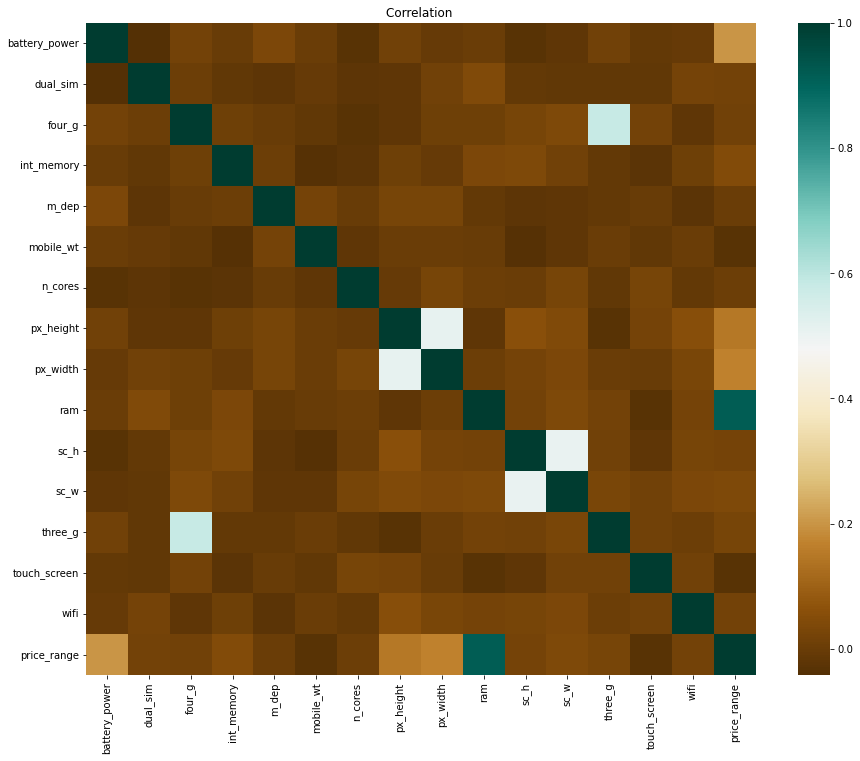

In [23]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

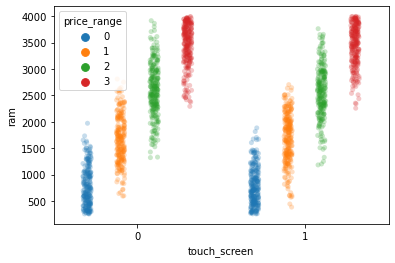

In [24]:
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

In [25]:
x=df.drop('price_range',axis=1)
y=df['price_range']

# Feature Engineering

In [26]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.005756,battery_power
1,1.007718,dual_sim
2,1.523621,four_g
3,1.006245,int_memory
4,1.004648,m_dep
5,1.003873,mobile_wt
6,1.006355,n_cores
7,1.366984,px_height
8,1.358572,px_width
9,1.006466,ram


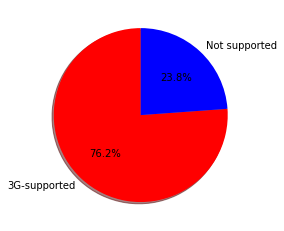

In [28]:
labels = ["3G-supported",'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

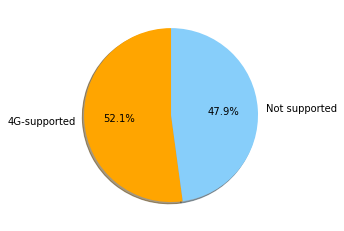

In [29]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

# Model Building

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)

 
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:63.800000000000004
Test Set Accuracy:63.0

Confusion Matrix:
[[97 27  0  0]
 [27 64 35  1]
 [ 1 29 57 27]
 [ 0  5 33 97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       124
           1       0.51      0.50      0.51       127
           2       0.46      0.50      0.48       114
           3       0.78      0.72      0.75       135

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.64      0.63      0.63       500



# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

lm_acc=lm.score(x_train,y_train)

print("Training Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Testing Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("Linear Regression Score:"+str(lm_acc))

Training Set Accuracy:63.800000000000004
Testing Set Accuracy:63.0
Linear Regression Score:0.9199093927004044


# K-Nearest Neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_test_pred1 = knn.predict(x_test)
y_train_pred1=knn.predict(x_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Training Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Testing Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Training Set Accuracy:95.13333333333334
Testing Set Accuracy:89.8

Confusion Matrix:
[[124  15   0   0]
 [  1 104  12   0]
 [  0   6 110  14]
 [  0   0   3 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       139
           1       0.83      0.89      0.86       117
           2       0.88      0.85      0.86       130
           3       0.89      0.97      0.93       114

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



# Support Vector Classifier

In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_test_pred2 = svc.predict(x_test)
y_train_pred2=svc.predict(x_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Training Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Testing Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Training Set Accuracy:95.06666666666666
Testing Set Accuracy:94.0

Confusion Matrix:
[[124   8   0   0]
 [  1 114   9   0]
 [  0   3 112   5]
 [  0   0   4 120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       132
           1       0.91      0.92      0.92       124
           2       0.90      0.93      0.91       120
           3       0.96      0.97      0.96       124

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_pred3 = dtc.predict(x_test)
y_train_pred3=dtc.predict(x_train)


print("Training Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Testing Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Training Set Accuracy:100.0
Testing Set Accuracy:83.0

Confusion Matrix:
[[112  14   0   0]
 [ 13  94  16   0]
 [  0  17  96  12]
 [  0   0  13 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       126
           1       0.75      0.76      0.76       123
           2       0.77      0.77      0.77       125
           3       0.90      0.90      0.90       126

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [36]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [37]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 5}

In [38]:
dtc = grid_search.best_estimator_

In [39]:
y_predi=dtc.predict(x_test)

In [40]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_predi)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 0.9253333333333333
Test Accuracy of SVC Model is 0.836


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

rfc_acc=rfc.score(x_test,y_test)

print("Training Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Testing Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("Random Forest Score:"+str(rfc_acc))

Training Set Accuracy:100.0
Testing Set Accuracy:83.0
Random Forest Score:0.854


# Models Listing

In [42]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Logistic Regression', 'KNN', 'SVC',  'Decision Tree Classifier','Random Forest'],
    'Score': [lm_acc,lr_acc, knn_acc, svc_acc, dtc_test_acc, rfc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,SVC,0.940000
0,Linear Regression,0.919909
2,KNN,0.898000
5,Random Forest,0.854000
4,Decision Tree Classifier,0.836000
1,Logistic Regression,0.630000


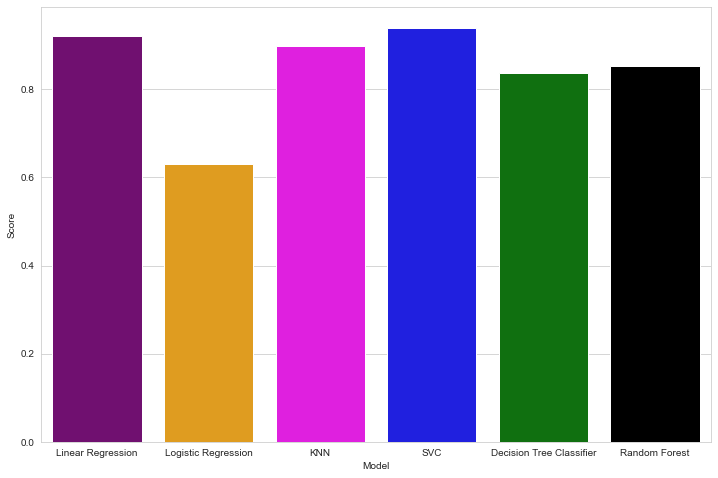

In [43]:
colors = ["purple", "orange", "magenta","blue","green","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

# Models Prediction

In [44]:
predicted_price1=lr.predict(x_test)
predicted_price1

array([1, 3, 2, 0, 3, 1, 0, 0, 3, 0, 2, 3, 1, 2, 0, 2, 0, 0, 1, 2, 2, 3,
       1, 3, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 1, 3, 0, 2, 1, 1, 3, 1, 0, 3,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 3, 3, 2, 1, 3, 0, 1, 0, 0, 3, 1, 1,
       1, 0, 3, 0, 0, 2, 3, 2, 1, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 1, 0, 0,
       1, 3, 1, 3, 0, 1, 0, 3, 3, 3, 3, 1, 2, 3, 1, 0, 3, 3, 1, 2, 3, 3,
       0, 3, 2, 0, 0, 3, 0, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       0, 2, 3, 0, 1, 3, 2, 3, 2, 1, 1, 2, 0, 3, 2, 2, 2, 3, 2, 1, 1, 1,
       0, 3, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2, 0, 0, 2, 2, 2, 0, 3, 2, 3, 0,
       1, 2, 2, 3, 0, 0, 1, 1, 3, 3, 0, 1, 0, 3, 3, 0, 3, 1, 1, 3, 2, 2,
       1, 3, 2, 3, 1, 1, 1, 3, 0, 3, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 3,
       0, 3, 2, 1, 2, 0, 3, 2, 1, 3, 0, 1, 0, 3, 3, 1, 3, 2, 2, 2, 0, 2,
       3, 2, 1, 3, 0, 3, 1, 0, 0, 2, 1, 3, 1, 1, 0, 0, 2, 1, 1, 3, 3, 3,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 0, 0, 2, 3, 3, 2, 2, 2,
       3, 3, 3, 3, 2, 3, 1, 1, 1, 1, 3, 3, 3, 2, 1,

In [45]:
predicted_price2=lm.predict(x_test)
predicted_price2

array([ 1.14443882e+00,  3.36062969e+00,  2.31138133e+00,  7.62126780e-01,
        3.23109756e+00,  1.21339650e+00,  5.87127993e-01, -1.28092527e-01,
        3.05790685e+00,  6.67781851e-01,  1.34669478e+00,  2.34184298e+00,
        1.09661435e+00,  2.07184068e+00, -5.17998378e-02,  1.51518372e+00,
        8.81754870e-01,  9.11484536e-01,  9.85188792e-01,  7.23697098e-01,
        1.64482689e+00,  3.14033090e+00,  7.26729169e-01,  3.08757424e+00,
        1.15211837e+00,  1.46621140e+00,  2.96777522e+00,  2.76938992e+00,
        1.69266847e+00,  1.01172365e+00,  1.58805010e+00,  2.44857048e+00,
        2.93269265e+00,  3.45888530e+00,  9.01833349e-01,  2.69993873e+00,
        6.54480287e-01,  2.85648964e+00, -4.45776927e-02,  1.39730310e+00,
        1.48888218e+00,  5.11965532e-01,  3.19635809e-01,  2.84700947e+00,
       -4.75869343e-01,  1.05475958e+00,  8.44820913e-02, -3.45089793e-01,
        9.42404431e-02,  1.52598811e+00,  5.17346415e-01,  3.40175045e-01,
       -4.79564341e-01,  

In [46]:
predicted_price3=knn.predict(x_test)
predicted_price3

array([1, 3, 2, 1, 3, 1, 0, 0, 3, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 3, 3, 3, 1, 3, 0, 3, 0, 1, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 3, 3, 1, 2, 3, 0, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 0, 0, 1, 1, 3, 1, 3, 0, 2, 2, 1, 2, 1, 3, 3, 2, 2, 0, 0,
       0, 2, 1, 3, 1, 2, 0, 3, 3, 2, 2, 2, 2, 3, 0, 0, 3, 3, 1, 3, 2, 3,
       0, 3, 2, 0, 0, 3, 1, 1, 0, 3, 3, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1,
       0, 1, 2, 0, 1, 3, 1, 3, 2, 0, 2, 1, 0, 3, 1, 2, 3, 3, 3, 1, 1, 0,
       0, 1, 0, 2, 1, 3, 2, 0, 1, 3, 1, 1, 1, 0, 1, 1, 3, 0, 2, 2, 3, 0,
       1, 3, 1, 1, 0, 0, 1, 2, 3, 2, 0, 1, 0, 2, 3, 0, 3, 1, 2, 3, 3, 3,
       0, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3,
       0, 3, 2, 2, 2, 0, 2, 1, 0, 3, 1, 1, 1, 2, 3, 2, 3, 1, 2, 1, 0, 2,
       3, 1, 0, 2, 1, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3,
       1, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1,
       3, 3, 3, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2,

In [47]:
predicted_price4=svc.predict(x_test)
predicted_price4

array([1, 3, 2, 1, 3, 1, 0, 0, 3, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 3,
       1, 3, 1, 1, 3, 3, 2, 1, 2, 3, 3, 3, 1, 3, 0, 3, 0, 1, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 3, 3, 1, 2, 3, 0, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 0, 0, 1, 1, 3, 1, 3, 1, 2, 2, 1, 2, 1, 3, 3, 2, 2, 0, 0,
       0, 2, 1, 3, 1, 1, 0, 3, 3, 3, 2, 2, 2, 3, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 3, 2, 0, 0, 3, 1, 2, 0, 3, 3, 2, 3, 2, 1, 1, 2, 0, 0, 3, 0, 1,
       0, 1, 2, 0, 1, 3, 2, 3, 2, 0, 1, 1, 0, 3, 1, 2, 3, 3, 3, 1, 1, 0,
       0, 1, 0, 2, 1, 3, 2, 0, 1, 3, 1, 1, 1, 0, 1, 2, 3, 0, 2, 2, 3, 0,
       1, 3, 1, 1, 0, 0, 1, 2, 3, 2, 0, 1, 0, 2, 3, 0, 3, 1, 2, 3, 3, 3,
       0, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3,
       0, 3, 2, 2, 3, 0, 2, 1, 0, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 1, 0, 2,
       3, 1, 0, 2, 1, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 1, 2, 3, 3, 2,
       1, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1,
       3, 3, 3, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3, 1, 2,

In [48]:
predicted_price5=dtc.predict(x_test)
predicted_price5

array([1, 3, 3, 1, 3, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 3, 3, 2, 0, 1, 2, 3, 3, 1, 3, 0, 3, 0, 1, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 3, 3, 1, 2, 3, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 2, 1, 3, 0, 1, 0, 3, 3, 3, 3, 2, 2, 3, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 3, 2, 0, 0, 3, 1, 1, 0, 3, 3, 2, 3, 2, 1, 1, 2, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 3, 1, 2, 1, 0, 1, 1, 0, 3, 2, 2, 3, 3, 3, 1, 1, 0,
       0, 1, 0, 3, 1, 3, 2, 0, 1, 3, 0, 1, 1, 0, 1, 1, 3, 1, 2, 2, 3, 0,
       1, 3, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 3, 3, 0, 3, 1, 2, 3, 3, 3,
       1, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 3,
       1, 3, 2, 2, 2, 0, 2, 1, 1, 3, 1, 1, 1, 2, 3, 2, 3, 1, 2, 1, 0, 1,
       3, 1, 0, 2, 1, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 1, 2, 3, 3, 3,
       1, 0, 1, 2, 1, 3, 3, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2,
       2, 3, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 3, 1, 2,

In [49]:
predicted_price6=rfc.predict(x_test)
predicted_price6

array([1, 3, 2, 1, 3, 1, 0, 0, 3, 0, 1, 3, 1, 2, 0, 1, 1, 1, 1, 1, 2, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 3, 3, 3, 1, 3, 0, 3, 0, 1, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 2, 3, 0, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 0, 0, 1, 1, 3, 1, 3, 0, 2, 2, 1, 2, 1, 3, 3, 2, 2, 0, 0,
       0, 2, 1, 3, 0, 1, 0, 3, 3, 3, 2, 2, 2, 2, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 3, 2, 0, 0, 3, 1, 1, 0, 2, 3, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1,
       0, 1, 3, 0, 1, 3, 1, 3, 1, 0, 1, 1, 0, 3, 2, 2, 3, 3, 3, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 2, 1, 1, 3, 1, 2, 0, 0, 1, 2, 3, 0, 2, 2, 3, 0,
       1, 3, 1, 2, 0, 0, 1, 1, 3, 2, 0, 1, 0, 3, 3, 0, 3, 1, 1, 3, 3, 2,
       1, 3, 2, 2, 2, 1, 1, 2, 0, 3, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3,
       0, 3, 3, 2, 3, 0, 2, 1, 1, 3, 1, 1, 1, 2, 3, 2, 3, 1, 2, 1, 0, 1,
       3, 1, 0, 2, 1, 3, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 2, 3, 3, 3,
       1, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2,
       2, 3, 3, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3, 1, 1,

In [50]:
def get_user_inputs():
    screen_size = float(input("Enter screen size (in inches): "))
    battery_capacity = float(input("Enter battery capacity (in mAh): "))
    internal_storage = int(input("Enter internal storage (in GB): "))
    camera_quality = int(input("Enter camera quality (in MP): "))
    return [screen_size, battery_capacity, internal_storage, camera_quality,]

In [ ]:
user_inputs = get_user_inputs()

In [ ]:
user_inputs = np.array(user_inputs).reshape(1, -1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2 
poly = PolynomialFeatures(degree)
user_input = poly.fit_transform(user_inputs)

In [ ]:
predicted_price_range = dtc.predict(user_input)

In [ ]:
if predicted_price_range == 0:
    print("Predicted Price Range: Very Low")
elif predicted_price_range == 1:
    print("Predicted Price Range: Low")
elif predicted_price_range == 2:
    print("Predicted Price Range: Medium")
elif predicted_price_range == 3:
    print("Predicted Price Range: High")    
else:
    print("Invalid price range prediction.")